# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:**Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 11/11/2020.

**Tema:** Regresión Polinomial:COVID-19 ECUADOR

# Ejercicio
**BASE DE DATOS ACTUALIZADA DEL COVID-19 EN ECUADOR**

Para la obtención de los datos se hizo una recolección que es propiamente realizada por el estudiante , de fuentes que se encuentran citadas en las referencias, los datos estan hasta la fecha de 30 de Octubre de 2020.


In [165]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline


## 1) Regresión Polinomial

La regresión polinómica es, en realidad, una regresión lineal. El truco está en:

- Calcular atributos polinómicos
- Usar la regresión lineal que ya hemos visto.

Para ello fijémonos en la ecuación de la recta que hemos ajustado con la regresión lineal

**y=a+bx**

Si quisieramos ajustar los datos con una función de segundo grado, de decir, una curva, necesitamos añadir un término cuadrático. Recordemos que x es un atributo de nuestros datos, así que vamos a añadir a la función este mismo atributo pero al cuadrado.

**y=a+bx+cx^2**


## Implemetación de la Regresión Polinomial

Text(0, 0.5, 'Número Casos')

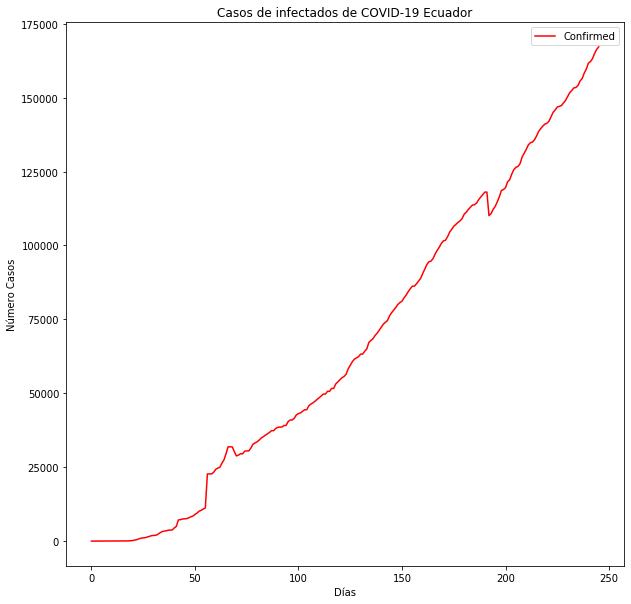

In [166]:
plt.rcParams['figure.figsize'] = [10, 10]
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
df = df.loc[:,['dateRep','Confirmed']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-28", FMT)).days)
# Represento los datos generados
ax = df.plot(x ='dateRep', y='Confirmed',color='red',title='Casos de infectados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

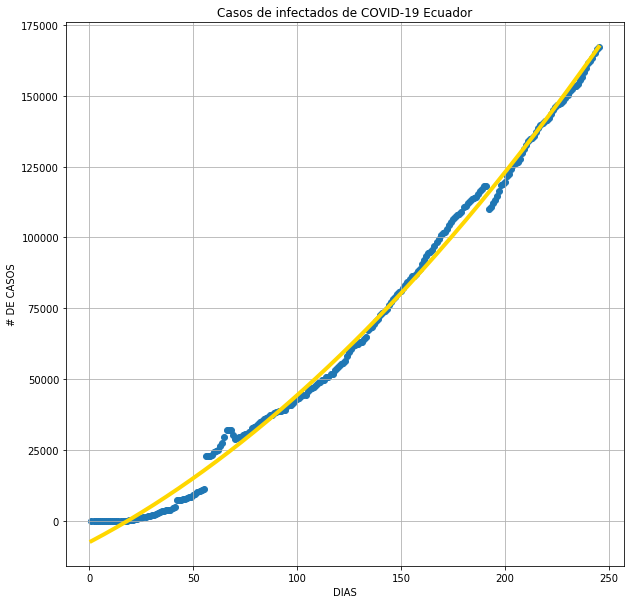

In [167]:
x = list(df.iloc [1::, 0]) # Fecha
y = list(df.iloc [1::, 1]) # Numero de casos
#Convertimos a un arreglo de 1 solo columna

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

#Como se veia en el caso de la regresion lineal , para obtener mejores resultados lo ideal sería una curva

#Esta transformación la podemos realizar fácilmente son SkLearn gracias PolynomialFeatures(). A la que le indicamos el grado de la función que queremos obtener. Haciendo uso del método fit_transform() obtendremos el término cuadrático que andamos buscando para nuestro modelo.
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
#print(x)
#print(x_poly)

#Defino el algoritmo a utilizar
model = linear_model.LinearRegression()

#Entrenamos
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.title('Casos de infectados de COVID-19 Ecuador')
plt.scatter(x, y)
plt.plot(x, y_pred, color='gold',lw=4)
plt.grid(True)
plt.xlabel('DIAS')
plt.ylabel('# DE CASOS')
plt.show()

Como podemos observar en la gráfica, la línea dorada sería nuestro modelo y los puntos azules son los datos reales.

In [168]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('Raíz del Error Cuadrático Medio (RMSE) : ' + str(rmse))#Mide la cantidad de error que hay entre dos conjuntos de datos.
print ('Coeficiente de Determinación R2: ' + str(r2))#Minestras mas cerccano a 1 , mejor ajuste.

Raíz del Error Cuadrático Medio (RMSE) : 3317.7843445372046
Coeficiente de Determinación R2: 0.9957697580661687


## CONCLUSIONES

Mediante el empleo de la regresión Polinomial se puede evidenciar que se puede obtener un mejor ajuste para nuestros datos y eso se corrobora con el nivel de ajuste que nos ofrece que es del 0.99% es un valor muy bueno, que nos da una idea lo que el modelo de regresion con ese ajuste puede relizar. 

# REFERENCIAS

https://www.ellaberintodefalken.com/2019/12/regresion-polinomica-polinomial.html

https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning-practica-con-python/